In [2]:
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('heights.csv')

In [8]:
data

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [12]:
data.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


<Axes: xlabel='height', ylabel='Density'>

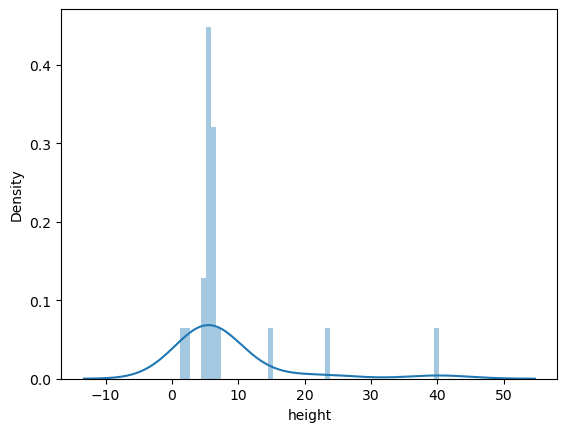

In [20]:
sns.distplot(data.height)

***Find Outlires***

In [22]:
Q1=data.height.quantile(0.25)
Q3=data.height.quantile(0.75)
Q1,Q3

(5.3500000000000005, 6.275)

In [26]:
IQR=Q3-Q1
IQR

0.9249999999999998

In [29]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
lower_lim,upper_lim

(3.962500000000001, 7.6625)

**The outliers are:**

In [34]:
out=data[(data.height<lower_lim)| (data.height>upper_lim)]
out

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


**Remove Outliers**

In [43]:
no_outliers=data[(data.height>=lower_lim)&(data.height<=upper_lim)]
no_outliers

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


<Axes: xlabel='height', ylabel='Density'>

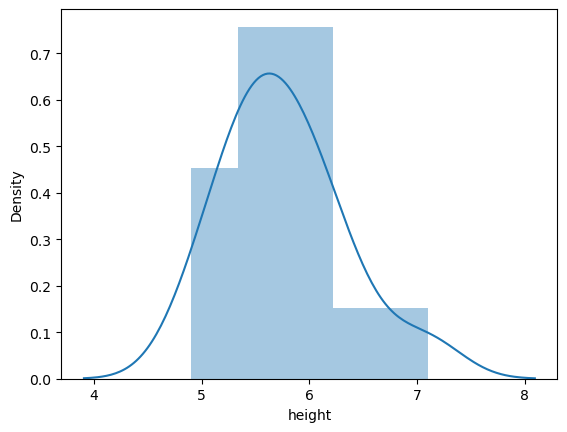

In [45]:
sns.distplot(no_outliers.height)

***Finding Outliers form SEABORN tips dataset***

In [56]:
tips=sns.load_dataset('tips')

In [58]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [62]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


**Finding Outliers On Total bill**

In [74]:
Q1=tips.total_bill.quantile(0.25)
Q3=tips.total_bill.quantile(.75)
IQR=Q3-Q1
IQR

10.779999999999998

In [76]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR

In [80]:
lower_lim,upper_lim

(-2.8224999999999945, 40.29749999999999)

In [84]:
out= tips[(tips.total_bill<lower_lim)|(tips.total_bill>upper_lim)]
out

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [88]:
#removing outliers
mod_tips=tips[(tips.total_bill>=lower_lim) &(tips.total_bill<=upper_lim)]
mod_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
